In [7]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

from DEN import DENlayer
from DMN import DMNlayer
from DSN import DSNlayer


from PreTrain.HpC import HSpC
from PreTrain.HpC import HEpC
from PreTrain.HpC import HBpC

from PreTrain.kmeans import bkmeans
from PreTrain.kmeans import ekmeans
from PreTrain.kmeans import skmeans



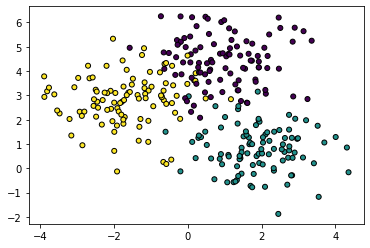

In [8]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

x, y = make_blobs(n_samples=300, centers=3, n_features=2,
                  random_state=0)

Y = to_categorical(y)


fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

plt.show()

In [10]:

unidades=3
hbpc_dendrites  = HBpC.HBpC(x,y,0.0001)
hepc_dendrites  = HEpC.HEpC(x,y)
hspc_dendrites  = HSpC.HSpC(x,y,0.0001)
bkmeans_dendrites  = bkmeans.bkmeans(x,Y,[3,3,3],0.01)
ekmeans_dendrites  = ekmeans.ekmeans(x,Y,[3])
skmeans_dendrites  = skmeans.skmeans(x,Y,[2],0.01)



Wmin: [-1.5768197372875836, 2.080284175223963] Wmax: [3.3595148534104373, 6.254662722680179]
Wmin: [-0.6040047165638629, -1.8750290964887133] Wmax: [4.3592842191168195, 3.1544871572361464]
Wmin: [-3.8965909184485086, -0.12836079346680385] Wmax: [1.1694200393416743, 5.330435940876871]
Clusters n [0 1 2]
clusters [[-1.61283478  3.1121752 ]
 [-1.74644504  1.83384564]
 [-1.51827611  3.44488647]
 [-2.48740839  2.1247649 ]
 [-1.74385358  3.36327551]
 [-1.96609354  3.09922069]
 [-3.20812223  2.0289109 ]
 [-2.45706052  2.73929317]
 [-0.07228289  2.88376939]
 [-2.5568393   2.5679389 ]
 [-0.93702419  2.55402345]
 [-3.47870811  2.25799053]
 [-1.65795802  4.05096214]
 [-1.36297544  3.01420362]
 [-1.91929301 -0.12826079]
 [-0.39830995  3.41388321]
 [-2.09621607  3.18778662]
 [-2.20492979  4.21572805]
 [-0.71238419  2.97680785]
 [-1.02821374  3.96585442]
 [-3.89107783  2.93821644]
 [-2.70606194  4.21931033]
 [-3.81552405  3.16936668]
 [-0.34552541  2.2859785 ]
 [-3.89649092  3.78193456]
 [-0.6510712

In [30]:

def DEN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DENlayer(n_dendrites, dendrites, activation = "relu", input_shape = (np.shape(x)[1],)))
    model.add(DENlayer(3, activation = 'softmax')) 
    return model




In [25]:
def DSN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DSNlayer(n_dendrites, dendrites, activation = "relu", input_shape = (np.shape(x)[1],)))
    model.add(DSNlayer(3, activation = 'softmax')) 
    return model



In [29]:
def DMN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DMNlayer(n_dendrites, dendrites, activation = "relu", input_shape = (np.shape(x)[1],)))
    model.add(DMNlayer(3, activation = 'softmax')) 
    return model



In [31]:

model = DMN_Test(0,bkmeans_dendrites)  #DMN_Test()/DEN_Test/DSN_Test
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dm_nlayer (DMNlayer)         (None, 3)                 12        
_________________________________________________________________
dm_nlayer_1 (DMNlayer)       (None, 3)                 18        
Total params: 30
Trainable params: 30
Non-traina

In [32]:
history = model.fit(X, Y,
                    epochs = 500,
                    batch_size = 128)


Epoch 1/500
3/3 [==============================] - 0s 665us/step - loss: 1.1374 - accuracy: 0.3000
Epoch 2/500
3/3 [==============================] - 0s 665us/step - loss: 1.0669 - accuracy: 0.3133
Epoch 3/500
3/3 [==============================] - 0s 665us/step - loss: 1.0176 - accuracy: 0.7933
Epoch 4/500
3/3 [==============================] - 0s 667us/step - loss: 0.9780 - accuracy: 0.9200
Epoch 5/500
3/3 [==============================] - 0s 664us/step - loss: 0.9442 - accuracy: 0.9333
Epoch 6/500
3/3 [==============================] - 0s 665us/step - loss: 0.9143 - accuracy: 0.9367
Epoch 7/500
3/3 [==============================] - 0s 656us/step - loss: 0.8863 - accuracy: 0.9400
Epoch 8/500
3/3 [==============================] - 0s 991us/step - loss: 0.8605 - accuracy: 0.9433
Epoch 9/500
3/3 [==============================] - 0s 671us/step - loss: 0.8366 - accuracy: 0.9433
Epoch 10/500
3/3 [==============================] - 0s 665us/step - loss: 0.8137 - accuracy: 0.9433
Epoch 11/

3/3 [==============================] - 0s 998us/step - loss: 0.3555 - accuracy: 0.9433
Epoch 84/500
3/3 [==============================] - 0s 665us/step - loss: 0.3543 - accuracy: 0.9400
Epoch 85/500
3/3 [==============================] - 0s 673us/step - loss: 0.3535 - accuracy: 0.9433
Epoch 86/500
3/3 [==============================] - 0s 665us/step - loss: 0.3521 - accuracy: 0.9400
Epoch 87/500
3/3 [==============================] - 0s 665us/step - loss: 0.3519 - accuracy: 0.9433
Epoch 88/500
3/3 [==============================] - 0s 664us/step - loss: 0.3505 - accuracy: 0.9433
Epoch 89/500
3/3 [==============================] - 0s 662us/step - loss: 0.3493 - accuracy: 0.9400
Epoch 90/500
3/3 [==============================] - 0s 333us/step - loss: 0.3487 - accuracy: 0.9433
Epoch 91/500
3/3 [==============================] - 0s 665us/step - loss: 0.3474 - accuracy: 0.9433
Epoch 92/500
3/3 [==============================] - 0s 997us/step - loss: 0.3469 - accuracy: 0.9400
Epoch 93/500


3/3 [==============================] - 0s 997us/step - loss: 0.3237 - accuracy: 0.9400
Epoch 165/500
3/3 [==============================] - 0s 663us/step - loss: 0.3237 - accuracy: 0.9433
Epoch 166/500
3/3 [==============================] - 0s 662us/step - loss: 0.3237 - accuracy: 0.9433
Epoch 167/500
3/3 [==============================] - 0s 668us/step - loss: 0.3236 - accuracy: 0.9467
Epoch 168/500
3/3 [==============================] - 0s 665us/step - loss: 0.3235 - accuracy: 0.9400
Epoch 169/500
3/3 [==============================] - 0s 665us/step - loss: 0.3235 - accuracy: 0.9367
Epoch 170/500
3/3 [==============================] - 0s 655us/step - loss: 0.3233 - accuracy: 0.9467
Epoch 171/500
3/3 [==============================] - 0s 668us/step - loss: 0.3236 - accuracy: 0.9367
Epoch 172/500
3/3 [==============================] - 0s 665us/step - loss: 0.3236 - accuracy: 0.9400
Epoch 173/500
3/3 [==============================] - 0s 665us/step - loss: 0.3235 - accuracy: 0.9400
Epoc

3/3 [==============================] - 0s 333us/step - loss: 0.3174 - accuracy: 0.9467
Epoch 246/500
3/3 [==============================] - 0s 665us/step - loss: 0.3174 - accuracy: 0.9400
Epoch 247/500
3/3 [==============================] - 0s 665us/step - loss: 0.3170 - accuracy: 0.9467
Epoch 248/500
3/3 [==============================] - 0s 665us/step - loss: 0.3171 - accuracy: 0.9433
Epoch 249/500
3/3 [==============================] - 0s 665us/step - loss: 0.3167 - accuracy: 0.9433
Epoch 250/500
3/3 [==============================] - 0s 667us/step - loss: 0.3167 - accuracy: 0.9433
Epoch 251/500
3/3 [==============================] - 0s 332us/step - loss: 0.3171 - accuracy: 0.9467
Epoch 252/500
3/3 [==============================] - 0s 997us/step - loss: 0.3162 - accuracy: 0.9467
Epoch 253/500
3/3 [==============================] - 0s 664us/step - loss: 0.3166 - accuracy: 0.9467
Epoch 254/500
3/3 [==============================] - 0s 665us/step - loss: 0.3160 - accuracy: 0.9500
Epoc

3/3 [==============================] - 0s 657us/step - loss: 0.3101 - accuracy: 0.9533
Epoch 327/500
3/3 [==============================] - 0s 703us/step - loss: 0.3100 - accuracy: 0.9467
Epoch 328/500
3/3 [==============================] - 0s 660us/step - loss: 0.3100 - accuracy: 0.9433
Epoch 329/500
3/3 [==============================] - 0s 665us/step - loss: 0.3099 - accuracy: 0.9433
Epoch 330/500
3/3 [==============================] - 0s 654us/step - loss: 0.3105 - accuracy: 0.9433
Epoch 331/500
3/3 [==============================] - 0s 670us/step - loss: 0.3107 - accuracy: 0.9467
Epoch 332/500
3/3 [==============================] - 0s 666us/step - loss: 0.3102 - accuracy: 0.9533
Epoch 333/500
3/3 [==============================] - 0s 661us/step - loss: 0.3101 - accuracy: 0.9500
Epoch 334/500
3/3 [==============================] - 0s 665us/step - loss: 0.3100 - accuracy: 0.9500
Epoch 335/500
3/3 [==============================] - 0s 657us/step - loss: 0.3102 - accuracy: 0.9500
Epoc

3/3 [==============================] - 0s 665us/step - loss: 0.3090 - accuracy: 0.9433
Epoch 408/500
3/3 [==============================] - 0s 665us/step - loss: 0.3086 - accuracy: 0.9467
Epoch 409/500
3/3 [==============================] - 0s 992us/step - loss: 0.3083 - accuracy: 0.9467
Epoch 410/500
3/3 [==============================] - 0s 667us/step - loss: 0.3089 - accuracy: 0.9433
Epoch 411/500
3/3 [==============================] - 0s 333us/step - loss: 0.3085 - accuracy: 0.9467
Epoch 412/500
3/3 [==============================] - 0s 665us/step - loss: 0.3080 - accuracy: 0.9467
Epoch 413/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.9433
Epoch 414/500
3/3 [==============================] - 0s 665us/step - loss: 0.3083 - accuracy: 0.9433
Epoch 415/500
3/3 [==============================] - 0s 665us/step - loss: 0.3083 - accuracy: 0.9433
Epoch 416/500
3/3 [==============================] - 0s 665us/step - loss: 0.3085 - accuracy: 0.9467
Epoch 

3/3 [==============================] - 0s 997us/step - loss: 0.3079 - accuracy: 0.9467
Epoch 489/500
3/3 [==============================] - 0s 665us/step - loss: 0.3077 - accuracy: 0.9433
Epoch 490/500
3/3 [==============================] - 0s 666us/step - loss: 0.3074 - accuracy: 0.9433
Epoch 491/500
3/3 [==============================] - 0s 665us/step - loss: 0.3075 - accuracy: 0.9467
Epoch 492/500
3/3 [==============================] - 0s 997us/step - loss: 0.3079 - accuracy: 0.9467
Epoch 493/500
3/3 [==============================] - 0s 665us/step - loss: 0.3075 - accuracy: 0.9433
Epoch 494/500
3/3 [==============================] - 0s 665us/step - loss: 0.3083 - accuracy: 0.9467
Epoch 495/500
3/3 [==============================] - 0s 665us/step - loss: 0.3075 - accuracy: 0.9433
Epoch 496/500
3/3 [==============================] - 0s 665us/step - loss: 0.3075 - accuracy: 0.9433
Epoch 497/500
3/3 [==============================] - 0s 332us/step - loss: 0.3079 - accuracy: 0.9433
Epoc

(260091, 3)
<class 'numpy.ndarray'>
[2. 2. 2. ... 0. 0. 0.]


Text(0, 0.5, 'x2')

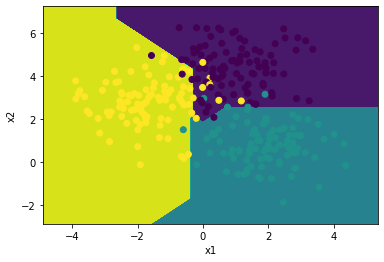

In [33]:
# Decision Boundary
h = 0.02
scale = 1
x_min, x_max = Xb[:, 0].min() - scale, Xb[:, 0].max() + scale
y_min, y_max = Xb[:, 1].min() - scale, Xb[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)
print(out.shape)

print(type(out))
out2 = np.zeros(out.shape[0])

for n in range(out.shape[0]):
    out2[n] = np.argmax(out[n])
          
    
print((out2))
out2 = out2.reshape(xx.shape)

#out = (out >= 0.5).astype(int)
#out = out.reshape(xx.shape)

plt.contourf(xx, yy, out2)
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb)
plt.xlabel('x1')
plt.ylabel('x2')